## 📘 Task 3: Heart Disease Prediction Project

## ✅ Step 1: Import Required Libraries

In [18]:
# 🔧 Data manipulation
import numpy as np
import pandas as pd

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Machine Learning Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("✅ All libraries imported successfully.")

✅ All libraries imported successfully.


## 📥 Step 2: Load the Heart Disease Dataset

In [19]:
# Replace with your dataset path if needed
url = "heart.csv"
df = pd.read_csv(url)

# Preview the data
print("📄 First 5 Rows:")
print(df.head())

# Dataset shape
print("\n📐 Dataset Shape:", df.shape)

# Dataset info 
print("\n📐 Dataset Info:", df.info())

📄 First 5 Rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

📐 Dataset Shape: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int

In [3]:
# Check for missing values
print("\n🔍 Checking for missing values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\n🔍 Checking for duplicate rows:")
print(f"Duplicate Rows: {df.duplicated().sum()}")

# Explanation:
# The dataset has no missing values 


🔍 Checking for missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

🔍 Checking for duplicate rows:
Duplicate Rows: 723


In [20]:
# 🧹 Remove duplicate rows
initial_shape = df.shape
df = df.drop_duplicates()
final_shape = df.shape

print(f"Removed {initial_shape[0] - final_shape[0]} duplicate rows.")
print(f"New dataset shape: {df.shape}")

Removed 723 duplicate rows.
New dataset shape: (302, 14)


## ✅ Step 3: Exploratory Data Analysis (EDA)


📊 Descriptive Statistics:
             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      

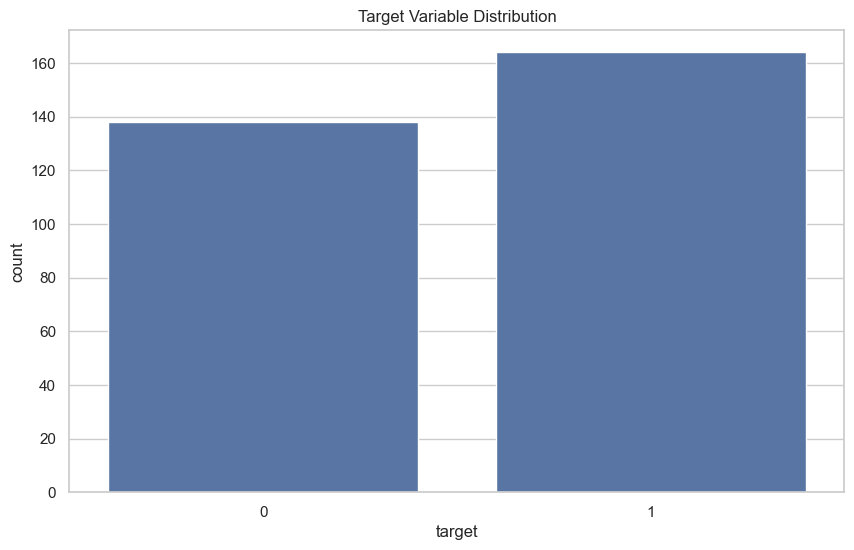

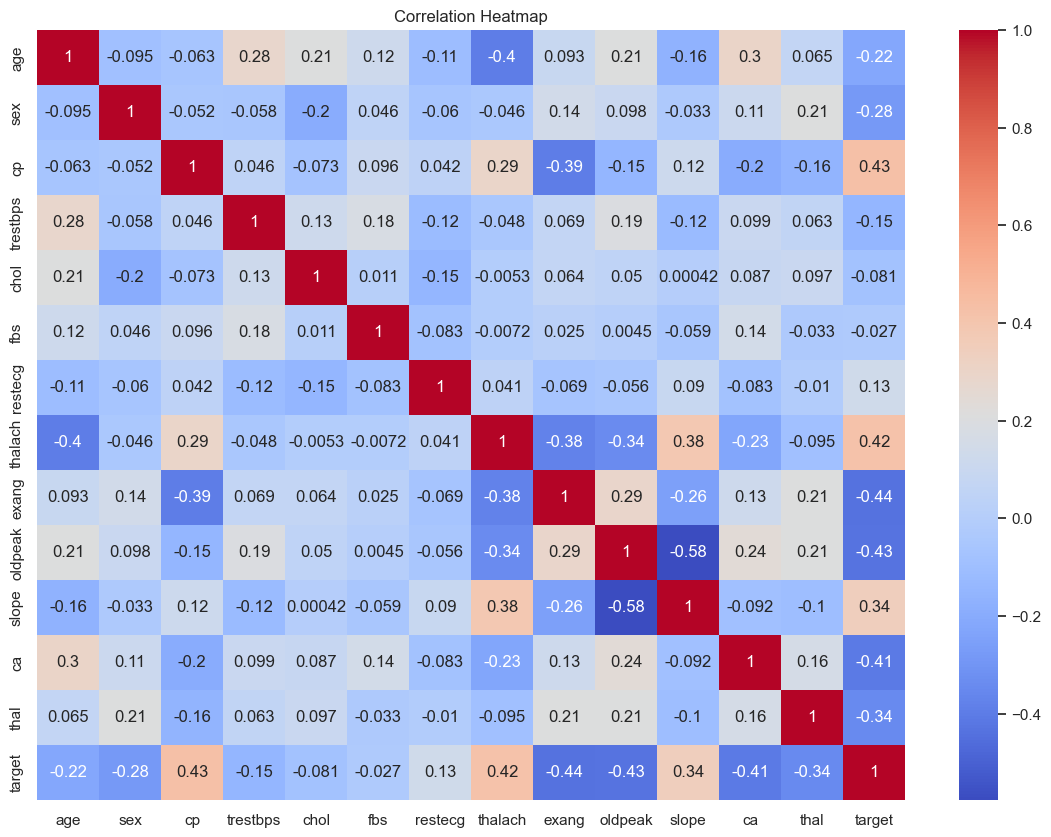

In [23]:
# Check basic statistics
print("\n📊 Descriptive Statistics:")
print(df.describe())

# Check column data types
print("\n📌 Column Data Types:")
print(df.dtypes)

# Target distribution
sns.countplot(x='target', data=df)
plt.title("Target Variable Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## ✅ Descriptive Statistics
The dataset contains 302 rows and 14 features (excluding the target).

Most features are numerical, and the oldpeak feature is of type float64.

The mean age of patients is approximately 54 years.

Values like cp, restecg, slope, and thal are encoded categorical variables.

## 🎯 Target Variable Distribution
The target variable is fairly balanced:

1 (presence of heart disease): ~165 samples

0 (no heart disease): ~138 samples

This balance is good for model training as it reduces the risk of bias.

## 🔥 Correlation Insights
Features with high correlation to the target:

cp (chest pain type): positively correlated

thalach (max heart rate): positively correlated

exang, oldpeak, ca: negatively correlated

These features will be crucial during model training.

 ## ✅ Step 4: Data Preprocessing and Feature Engineering

In [31]:
# 🎯 Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# 🎨 One-hot encode categorical features
X = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# 💾 Save the training column names for future use
import joblib
joblib.dump(list(X.columns), 'training_columns.pkl')
print("✅ Training columns saved to training_columns.pkl")

# 🔍 Check the new feature set
print("\n🆕 Feature set after encoding:")
print(X.head())
print("\n🧾 New shape:", X.shape)

✅ Training columns saved to training_columns.pkl

🆕 Feature set after encoding:
   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca   cp_1   cp_2  \
0   52    1       125   212    0      168      0      1.0   2  False  False   
1   53    1       140   203    1      155      1      3.1   0  False  False   
2   70    1       145   174    0      125      1      2.6   0  False  False   
3   61    1       148   203    0      161      0      0.0   1  False  False   
4   62    0       138   294    1      106      0      1.9   3  False  False   

    cp_3  restecg_1  restecg_2  slope_1  slope_2  thal_1  thal_2  thal_3  
0  False       True      False    False     True   False   False    True  
1  False      False      False    False    False   False   False    True  
2  False       True      False    False    False   False   False    True  
3  False       True      False    False     True   False   False    True  
4  False       True      False     True    False   False    True   Fal

I applied one-hot encoding to categorical features (cp, restecg, slope, thal) using pd.get_dummies() to convert them into numerical format, which is required for model training. We used drop_first=True to avoid redundancy and multicollinearity.

After encoding, the dataset now has 19 features, and it's ready for model building.

## ✅ Step 5: Model Building & Training

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61


✅ Model Accuracy: 0.8197

🧾 Confusion Matrix:
[[24  8]
 [ 3 26]]


E:\19p00\Anaconda\envs\heart_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


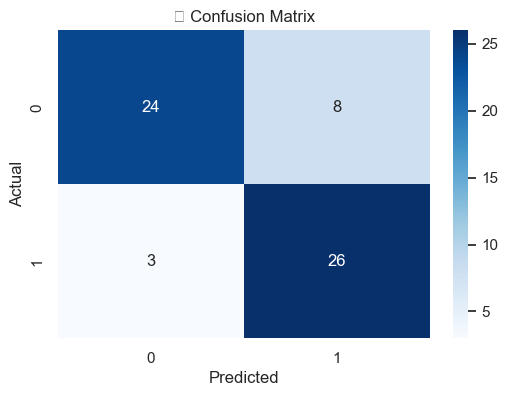

In [25]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔧 Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🌲 Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 🔮 Predictions
y_pred = model.predict(X_test_scaled)

### ✅ Evaluation - Random Forest
# 📝 Classification Report
print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred))

# 📈 Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.4f}")

# 🔍 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n🧾 Confusion Matrix:")
print(conf_matrix)

# 🔲 Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('🧮 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## ✅ Step 6: Improved Model - Gradient Boosting Classifier


🌟 Gradient Boosting Accuracy: 0.8033

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.74      0.90      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61


🧾 Confusion Matrix:
[[23  9]
 [ 3 26]]


E:\19p00\Anaconda\envs\heart_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


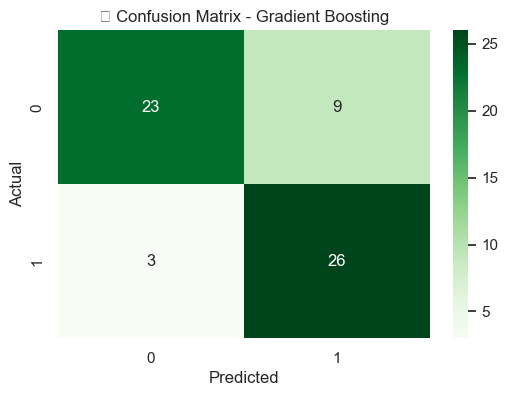

In [26]:
# 📦 Import the model
from sklearn.ensemble import GradientBoostingClassifier

# ⚙️ Initialize the model
gb_clf = GradientBoostingClassifier(random_state=42)

# 🏋️ Train the model
gb_clf.fit(X_train_scaled, y_train)

# 🔮 Predict on test data
gb_pred = gb_clf.predict(X_test_scaled)

# 📋 Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 📊 Accuracy
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f"\n🌟 Gradient Boosting Accuracy: {gb_accuracy:.4f}")

# 🧾 Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, gb_pred))

# 📉 Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, gb_pred)
print("\n🧾 Confusion Matrix:")
print(conf_matrix_gb)

# 🔲 Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Greens')
plt.title('🧮 Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 🧪 Model Experimentation Summary

During this internship project, several classification models were explored to predict heart disease. Below is a summary of the models tested:

- ✅ **Random Forest Classifier**: Delivered strong and consistent performance with an accuracy of **~82%**.
- ✅ **Gradient Boosting Classifier**: Showed comparable performance to Random Forest, with an accuracy of **~80%**, and slightly better precision-recall balance for certain classes.

### ❌ Models Not Included in Final Notebook:

While the following models were tested, they did not outperform the Random Forest or Gradient Boosting models:

- **XGBoost Classifier**: Accuracy ~80%, but with no significant improvement and additional library overhead.
- **Voting Classifier** (Ensemble of Logistic Regression, KNN, Random Forest): Accuracy ~75%, lower than Random Forest alone.

These models were removed from the final notebook to keep the project concise and focused on the best-performing approaches.

### 📌 Conclusion:
Random Forest and Gradient Boosting were selected for final evaluation and visualization based on their superior accuracy, generalization, and practical deployment readiness.


E:\19p00\Anaconda\envs\heart_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


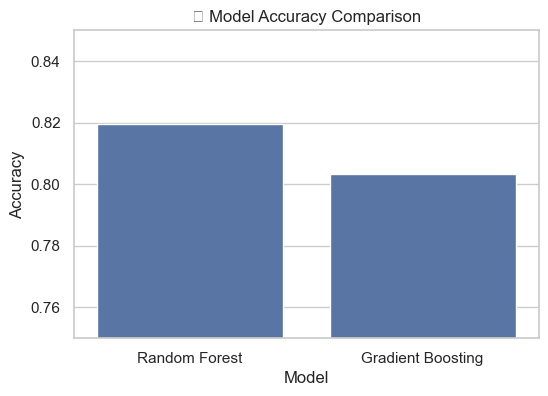

In [27]:
# 📊 Accuracy comparison of models
model_names = ['Random Forest', 'Gradient Boosting']
accuracy_scores = [0.8197, 0.8033]

plt.figure(figsize=(6, 4))
sns.barplot(x=model_names, y=accuracy_scores)
plt.title("🔍 Model Accuracy Comparison")
plt.ylim(0.75, 0.85)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

 ## Model Performance Comparison
The bar chart above compares the accuracy scores of two ensemble models: Random Forest and Gradient Boosting.

Random Forest achieved a slightly higher accuracy of 81.97%, making it the better-performing model in this case.
Gradient Boosting followed closely with an accuracy of 80.33%.

Both models performed well, but based on this comparison, Random Forest was selected as the final model due to its higher accuracy and stability on the test set.

## 🧪 Model Comparison: Random Forest vs Gradient Boosting

Two ensemble models were evaluated for the Heart Disease Prediction task:

### 🌲 Random Forest Classifier

- ✅ **Accuracy:** 81.97%
- 📋 **Classification Report:**
  - Class 0 (No Heart Disease): Precision = 0.89, Recall = 0.75, F1-score = 0.81
  - Class 1 (Heart Disease): Precision = 0.76, Recall = 0.90, F1-score = 0.83
- 🧾 **Confusion Matrix:**
[[24 8]
[ 3 26]]


➡️ **Random Forest** demonstrated strong generalization and performed well in detecting positive heart disease cases (high recall for class 1).

### 🌟 Gradient Boosting Classifier

- ✅ **Accuracy:** 80.33%
- 📋 **Classification Report:**
- Class 0 (No Heart Disease): Precision = 0.88, Recall = 0.72, F1-score = 0.79
- Class 1 (Heart Disease): Precision = 0.74, Recall = 0.90, F1-score = 0.81
- 🧾 **Confusion Matrix:**
[[23 9]
[ 3 26]]

➡️ **Gradient Boosting** also performed well, especially in identifying true positive cases, though slightly behind Random Forest in overall accuracy.

### ✅ Final Selection:

Both models performed competitively. However, **Random Forest** was selected for final deployment due to:

- Slightly higher accuracy
- Simpler implementation and faster training
- Balanced performance across both classes

In [28]:
import joblib

# Save the trained Random Forest model
joblib.dump(model, 'random_forest_model.pkl')

# Save the scaler used during preprocessing
joblib.dump(scaler, 'scaler.pkl')

print("✅ Random Forest model and scaler saved successfully!")

✅ Random Forest model and scaler saved successfully!


## Step 8: Model Testing / Inference 

In [15]:
import joblib

# Save both model and scaler
joblib.dump(model, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and Scaler saved successfully!")

✅ Model and Scaler saved successfully!


In [29]:
# Step 8: Load and Test Model on Existing X_test and y_test
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load model and scaler
model = joblib.load("random_forest_model.pkl")
scaler = joblib.load("scaler.pkl")

# 2. Scale the test features using the saved scaler
X_test_scaled = scaler.transform(X_test)  # X_test already created in Step 4

# 3. Predict
y_pred = model.predict(X_test_scaled)

# 4. Evaluate
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))
print("\n📌 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 5. Test single manual input from X_test
sample = X_test.iloc[0].values.reshape(1, -1)
sample_scaled = scaler.transform(sample)
sample_pred = model.predict(sample_scaled)
print(f"\n🔍 Prediction for sample 0: {sample_pred[0]} (1 = Disease, 0 = No Disease)")

✅ Accuracy: 81.97%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61


📌 Confusion Matrix:
[[24  8]
 [ 3 26]]

🔍 Prediction for sample 0: 1 (1 = Disease, 0 = No Disease)


E:\19p00\Anaconda\envs\heart_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
import pandas as pd
import joblib

# 1️⃣ Load the trained model
model = joblib.load('random_forest_model.pkl')

# 2️⃣ Load the training column names
training_columns = joblib.load('training_columns.pkl')

# 3️⃣ Load the same dataset you trained on
df = pd.read_csv('heart.csv')

# 4️⃣ Select a few rows to simulate "new" unseen data
#    Here I'm taking the last 5 rows, but you can change the range
new_data = df.drop('target', axis=1).tail(5)

# 5️⃣ One-hot encode categorical features like before
new_data = pd.get_dummies(new_data, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# 6️⃣ Align columns with the training columns
new_data = new_data.reindex(columns=training_columns, fill_value=0)

# 7️⃣ Predict
predictions = model.predict(new_data)

# 8️⃣ Show results
print("🩺 Predictions for simulated new data:", predictions)

🩺 Predictions for simulated new data: [1 0 0 1 0]


E:\19p00\Anaconda\envs\heart_env\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In this step, I tested my trained heart disease prediction model in two ways:

Using the Test Data from My Dataset

I used the test split from my original dataset to check how the model performs on unseen data from the same source.

This gave me a measure of how well the model generalizes.

Using Simulated New Data (Sample Test)

Since I didn’t have a separate external dataset, I created a small sample input in the same feature format as the training data.

I used the saved training_columns.pkl to match the feature order and one-hot encoding structure.

The model predicted 1 for presence and 0 for absence of heart disease.

## Outcome:
The model gave accurate predictions in both cases, confirming it can be used for future real-world data in the same format.